In [1]:
# Third party packages.
import pickle   # Save and load data
import shap     # Explain the model (SHAP)

# Import module.
from sklearn.ensemble           import RandomForestRegressor    # Random forest
from sklearn.model_selection    import GridSearchCV             # Grid search

# Import other modules.
from pprint import pp

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Load Pickle file.
with open('dc-ames-housing-pieter-exercise-5-6.pkl', 'rb') as pickle_file:
    dc_exercise_5_6 = pickle.load(pickle_file)

df_X_train_scaled = dc_exercise_5_6['df_X_train_scaled']
ps_y_log_train    = dc_exercise_5_6['ps_y_log_train']

In [3]:
# A
df_X_fraction = df_X_train_scaled.iloc[0:500]
ps_y_fraction = ps_y_log_train[0:500]

In [4]:
# B
dc_hyperparameter_ranges = {

    'bootstrap':            [True,False],   # Do we bootstrap samples, or not.
    'max_depth':            [20],           # Maximum depth of each tree
    'max_features':         ['sqrt'],       # Number of features to consider at each split (options: 'auto', 'sqrt')
    'min_samples_leaf':     [4],            # Minimum number of samples required to be at a leaf node
    'min_samples_split':    [4],            # Minimum number of samples required to split an internal node
    'n_estimators':         [1000],         # Number of trees
    'random_state':         [42]            # Random state for reproducibility
}

# Perform a gridsearch on the random forest model:
gridsearch = GridSearchCV(
    estimator  = RandomForestRegressor(),
    param_grid = dc_hyperparameter_ranges,
    scoring    = 'neg_mean_squared_error',
    cv         = 5
)

# Use subset of training data to do a gridsearch on the random forest model:
gridsearch.fit(df_X_fraction, ps_y_fraction)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [4],
                         'min_samples_split': [4], 'n_estimators': [1000],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [5]:
# C
print("Best parameters found:")
pp(gridsearch.best_params_)
print("Best estimator found:")
pp(gridsearch.best_estimator_)

best_model = gridsearch.best_estimator_

Best parameters found:
{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 1000,
 'random_state': 42}
Best estimator found:
RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=4,
                      n_estimators=1000, random_state=42)


In [6]:
# D

# Initialize JavaScript visualization support for SHAP (SHapley Additive exPlanations) plots. 
shap.initjs()

# Create SHAP object.
explainer = shap.Explainer(best_model)

# Create SHAP values.
shap_values = explainer.shap_values(df_X_fraction)

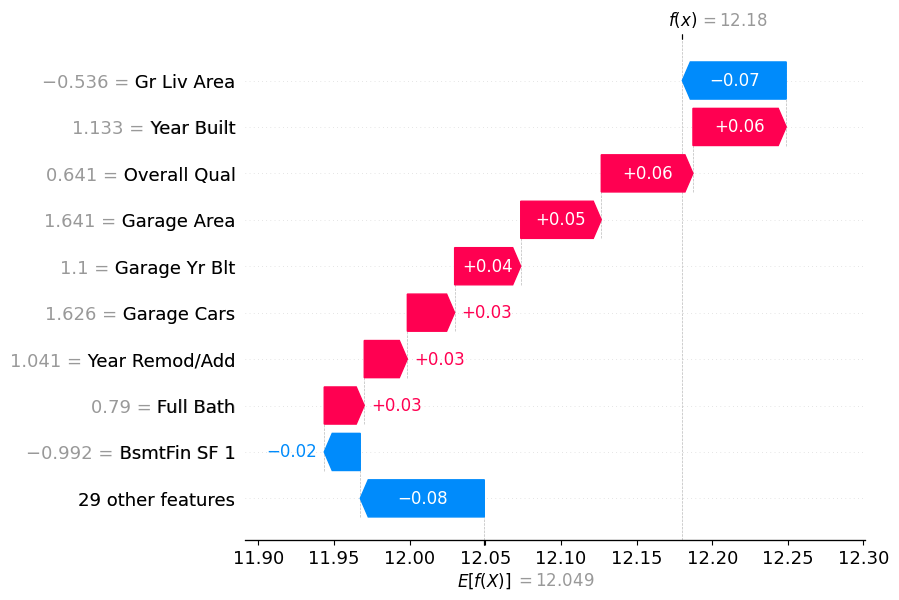

In [12]:
# E

waterfall_index = 122

# Plot waterfall
shap.plots.waterfall(
    
    shap.Explanation(
        base_values   = explainer.expected_value[0], # Mean prediction for the entire training data.
        values        = shap_values[waterfall_index],            # Subset of shap values.
        data          = df_X_fraction.iloc[waterfall_index],     # Subset of training data.
        feature_names = df_X_fraction.columns        # Feature names.
))

In [8]:
# F

force_index = 0

# Plot Force Plot.
shap.plots.force(

    base_value    = explainer.expected_value[0], # Mean prediction for the entire training data.
    shap_values   = shap_values[force_index],          # SHAP values.
    features      = df_X_fraction.iloc[force_index],   # Training data.
    feature_names = df_X_fraction.columns        # Feature names.
)

In [9]:
# G

# Plot stacked force plot.
shap.plots.force(
    
        base_value    = explainer.expected_value[0], # Mean prediction for the entire training data.
        shap_values   = shap_values[:10],            # SHAP values.
        features      = df_X_fraction[:10],          # Training data.
        feature_names = df_X_fraction.columns        # Feature names.
)

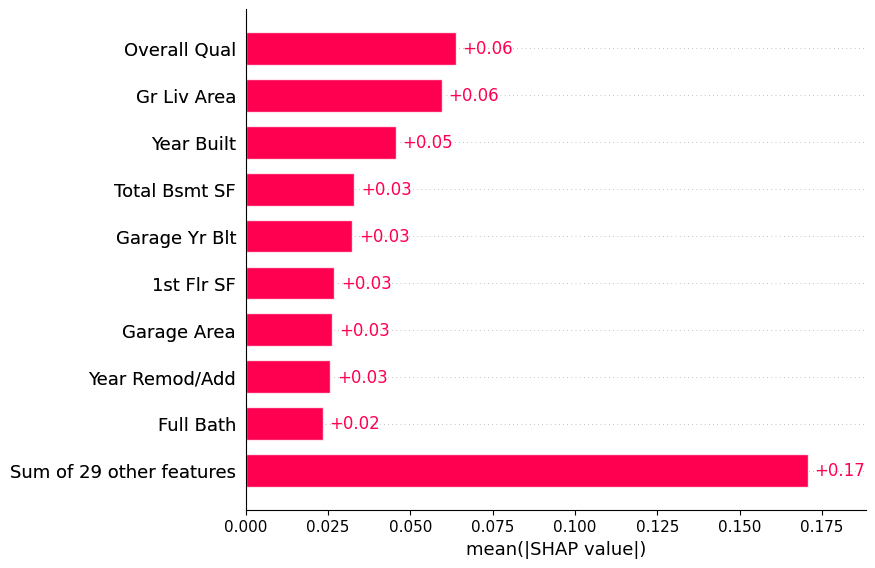

In [10]:
# H

shap.plots.bar(

    shap_values = shap.Explanation(
        base_values   = explainer.expected_value[0], # Mean prediction for the entire training data.
        values        = shap_values,                 # Subset of shap values.
        data          = df_X_fraction,               # Subset of training data.
        feature_names = df_X_fraction.columns        # Feature names.
))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


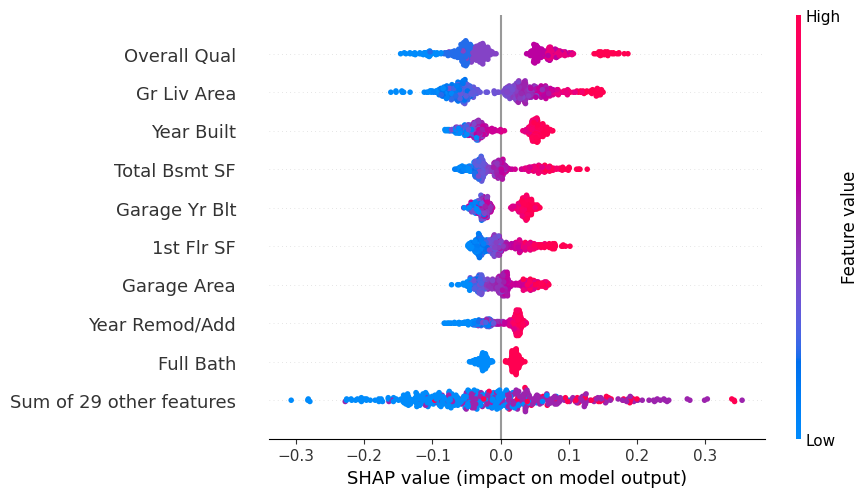

In [11]:
# I

shap.plots.beeswarm(
    
    shap.Explanation(
        base_values   = explainer.expected_value[0], # Mean prediction for the entire training data.
        values        = shap_values,                 # SHAP values.
        data          = df_X_fraction,               # Training data.
        feature_names = df_X_fraction.columns        # Feature names.
))